In [1]:
import numpy as np
import xray
import dask.array as daskarray
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import xgcm

In [3]:
iter0 = 2920
iterN = 207320
delta_iter = 2920
deltaT = 900
iters = range(iter0, iterN, delta_iter)

ddir = '/data/scratch/rpa/SOSE/run_np240_layers'
ds = xgcm.open_mdsdataset(ddir, iters, deltaT=deltaT,
            prefix=['DiagLAYERS-diapycnal','DiagLAYERS-transport'])
gcm = xgcm.GCMDataset(ds)

/home/rpa/xgcm/xgcm/mdsxray.py:272: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [4]:
ds

<xray.Dataset>
Dimensions:               (X: 2160, Xp1: 2160, Y: 320, Yp1: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, layers1RHO_bounds: 70, layers1RHO_center: 69, layers1RHO_interface: 68, time: 70)
Coordinates:
    YC                    (Y, X) >f4 -77.875 -77.875 -77.875 -77.875 -77.875 ...
    YG                    (Yp1, Xp1) >f4 -77.9583 -77.9583 -77.9583 -77.9583 ...
    rA                    (Y, X) >f4 7.21182e+07 7.21182e+07 7.21182e+07 ...
  * Xp1                   (Xp1) >f4 5.55112e-17 0.166667 0.333333 0.5 ...
    PHrefC                (Z) >f4 49.05 152.055 264.87 387.495 519.93 667.08 ...
    PHrefF                (Zp1) >f4 0.0 98.1 206.01 323.73 451.26 588.6 ...
    dxG                   (Yp1, X) >f4 3865.71 3865.71 3865.71 3865.71 ...
    dxC                   (Y, Xp1) >f4 3892.06 3892.06 3892.06 3892.06 ...
  * Zl                    (Zl) >f4 0.0 -10.0 -21.0 -33.0 -46.0 -60.0 -76.0 ...
  * Yp1                   (Yp1) >f4 -77.9583 -77.7916 -77.625 -77.4583 ...
  * Zp1            

In [5]:
ds_annmean = ds.mean(dim='time')

In [6]:
ds_aabw = ds_annmean.sel(layers1RHO_interface=slice(27.8,30)).mean(dim='layers1RHO_interface')

In [7]:
wmt_heat_aabw = ds_aabw.LaTs1RHO.load()
wmt_salt_aabw = ds_aabw.LaSs1RHO.load()


In [15]:
import sose_maps

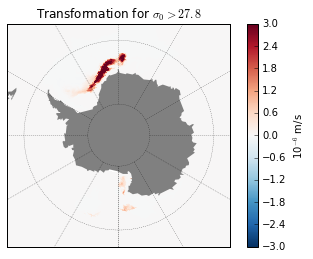

In [31]:
fac = 1e6
pc, bm = sose_maps.pcolormesh(ds.XC.values, ds.YC.values, fac*wmt_heat_aabw, labels=[0,0,0,0], 
                                      cmap='RdBu_r', rasterized=True)
pc.set_clim([-3,3])
plt.title('Transformation for $\sigma_0 > 27.8$')
cb = plt.colorbar()
cb.set_label('10$^{-6}$ m/s')


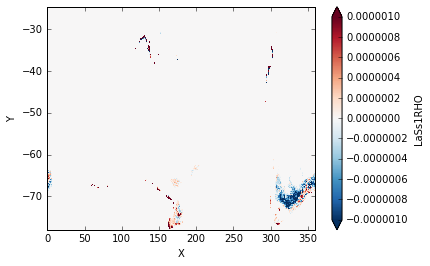

In [11]:
wmt_salt_aabw.plot(vmin=-1e-6, vmax=1e-6, cmap='RdBu_r')

In [14]:
ds_annmean.layers1RHO_interface.sel(layers1RHO_interface=slice(27.79,30))

<xray.DataArray 'layers1RHO_interface' (layers1RHO_interface: 12)>
array([ 27.79650879,  27.81738281,  27.83605957,  27.85229492,
        27.86645508,  27.87817383,  27.88769531,  27.89501953,
        27.90002441,  27.9050293 ,  27.91003418,  27.91503906], dtype=float32)
Coordinates:
  * layers1RHO_interface  (layers1RHO_interface) >f4 27.7965 27.8174 27.8361 ...
Attributes:
    units: kg / m^3
    description: potential density layer interfaces